# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
# YOUR CODE HERE!

In [5]:

# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = requests.get(btc_url)
btc_response = btc_price.content
btc_data = btc_price.json()


# Fetch current ETH price
# YOUR CODE HERE!
eth_price = requests.get(eth_url)
eth_response = eth_price.content
eth_data = eth_price.json()

# Compute current value of my crpto
btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42776.40
The current value of your 5.3 ETH is $12736.38


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)
# YOUR CODE HERE!

In [13]:
# Format current date as ISO format
# YOUR CODE HERE!
end = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()
start = pd.Timestamp("2020-01-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = start ,
    end = end
).df


# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2020-01-21 00:00:00-05:00  113.25  113.41  113.220  113.37  7641226  330.90   
2020-01-22 00:00:00-05:00  113.44  113.49  113.390  113.44  5049890  332.24   
2020-01-23 00:00:00-05:00  113.64  113.70  113.580  113.59  6653596  330.63   
2020-01-24 00:00:00-05:00  113.68  113.89  113.670  113.80  4588656  332.44   
2020-01-27 00:00:00-05:00  114.14  114.16  114.047  114.14  3332986  323.03   

                                                             
                             high     low   close    volume  
time                                                         
2020-01-21 00:00:00-05:00  332.18  330.82  331.31  61781634  
2020-01-22 00:00:00-05:00  332.95  331.17  331.39  43124687  
2020-01-23 00:00:00-05:00  331.92  329.41  331.74  41825254  
2020-01-24 00:00:00-05:00  332.53  327.36  328.75  75281306  
2020-01-27 00:00:00-05:00  325.12  322.66  323.52  68815393

In [15]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.37
Current SPY closing price: $331.31


In [16]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16565.50
The current value of your 200 AGG shares is $22674.00


### Savings Health Analysis

In [28]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 8000

# Consolidate financial assets data
# YOUR CODE HERE!
total_portfolio_dictionary = {'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(total_portfolio_dictionary,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,55512.777
Shares,39239.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

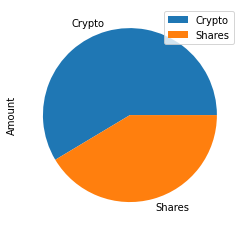

In [29]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

# YOUR CODE HERE!

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.sum().item()


# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [33]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = start,
    end = end
).df
# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2020-01-21 00:00:00-05:00  113.25  113.41  113.220  113.37  7641226  330.90   
2020-01-22 00:00:00-05:00  113.44  113.49  113.390  113.44  5049890  332.24   
2020-01-23 00:00:00-05:00  113.64  113.70  113.580  113.59  6653596  330.63   
2020-01-24 00:00:00-05:00  113.68  113.89  113.670  113.80  4588656  332.44   
2020-01-27 00:00:00-05:00  114.14  114.16  114.047  114.14  3332986  323.03   

                                                             
                             high     low   close    volume  
time                                                         
2020-01-21 00:00:00-05:00  332.18  330.82  331.31  61781634  
2020-01-22 00:00:00-05:00  332.95  331.17  331.39  43124687  
2020-01-23 00:00:00-05:00  331.92  329.41  331.74  41825254  
2020-01-24 00:00:00-05:00  332.53  327.36  328.75  75281306  
2020-01-27 00:00:00-05:00  325.12  322.66  323.52  68815393

In [34]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [35]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_year.portfolio_data.head()


AGG                                    \
                             open    high      low   close   volume   
time                                                                  
2020-01-21 00:00:00-05:00  113.25  113.41  113.220  113.37  7641226   
2020-01-22 00:00:00-05:00  113.44  113.49  113.390  113.44  5049890   
2020-01-23 00:00:00-05:00  113.64  113.70  113.580  113.59  6653596   
2020-01-24 00:00:00-05:00  113.68  113.89  113.670  113.80  4588656   
2020-01-27 00:00:00-05:00  114.14  114.16  114.047  114.14  3332986   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2020-01-21 00:00:00-05:00          NaN  330.90  332.18  330.82  331.31   
2020-01-22 00:00:00-05:00     0.000617  332.24  332.95  331.17  331.39   
2020-01-23 00:00:00-05:00     0.001322  330.63  331.92  329.41  331.74   
2020-01-24 00:00:00-05:00     0.001849  332.44  332.53  327.36  328.75   
2020-01-27 00:00:00-05:00     0.002988  323.03  325.12  322.66  323.52   

                                                  
                             volume daily_return  
time                                              
2020-01-21 00:00:00-05:00  61781634          NaN  
2020-01-22 00:00:00-05:00  43124687     0.000241  
2020-01-23 00:00:00-05:00  41825254     0.001056  
2020-01-24 00:00:00-05:00  75281306    -0.009013  
2020-01-27 00:00:00-05:00  68815393    -0.015909

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.019797,1.004768,0.998830,0.988996,1.028940,0.981048,1.010671,1.016812,1.000036,1.005725,...,1.004967,1.018506,0.990774,0.993524,0.973214,1.023276,1.012099,0.997538,0.982520,1.011255
2,1.018525,1.036213,0.992951,1.003599,1.030740,0.992932,1.000078,1.011542,1.015776,0.999062,...,0.988525,1.011351,1.009777,0.964568,0.995730,1.028059,0.991739,1.001729,0.985560,1.020563
3,1.033276,1.030206,1.006489,1.012929,1.046130,0.962207,0.999430,1.050068,1.009292,1.009842,...,0.998364,1.015098,1.011608,1.007816,0.988662,1.013554,0.995157,1.002273,0.976478,1.010966
4,1.005119,1.053784,0.998188,1.000955,1.034719,0.925954,1.013644,1.071962,1.013654,1.013111,...,0.997260,1.002269,0.995828,0.991533,0.995494,1.012923,0.998356,1.000512,0.982359,1.032592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.422595,4.074955,1.689400,42.706992,2.603454,10.083178,1.058962,3.740100,5.325833,19.010108,...,8.467507,14.624607,9.272039,127.155402,9.719202,1.252164,9.377926,10.795320,28.465878,8.628939
7557,2.413782,4.111587,1.685201,42.740894,2.562493,9.885212,1.066076,3.726536,5.381181,19.503884,...,8.411334,14.798418,9.320825,126.734428,9.950657,1.260825,9.607811,10.984154,28.451143,8.909128
7558,2.379293,4.134186,1.682710,42.238853,2.598536,9.826937,1.050154,3.795401,5.318338,19.697445,...,8.405159,14.950037,9.051731,127.846079,9.919265,1.282139,9.527528,11.121978,28.524280,8.776358
7559,2.372547,4.133200,1.666613,42.527536,2.661953,9.878733,1.022468,3.679801,5.224877,20.061409,...,8.426376,15.042216,9.100189,128.288578,9.752538,1.274609,9.431240,10.932175,28.334687,8.843059


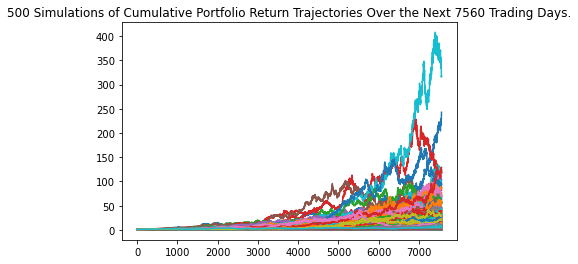

In [37]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty_year.plot_simulation()
print

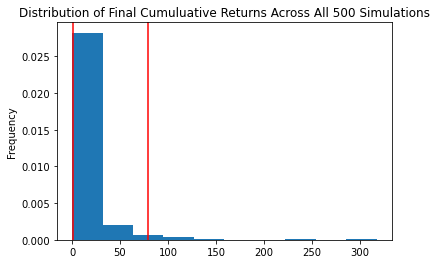

In [38]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty_year.plot_distribution()


### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
table = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(table)

count           500.000000
mean             14.841919
std              25.856765
min               0.093921
25%               2.953771
50%               6.820524
75%              15.867236
max             317.416119
95% CI Lower      0.503203
95% CI Upper     79.232076
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(table[8]*initial_investment,2)
ci_upper = round(table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $10064.06 and $1584641.53


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(table[8]*initial_investment,2)
ci_upper = round(table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $15096.08 and $2376962.29


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!


In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")